# predicting log trip duration
#use linear regression


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # matplotlib for plotting

import re # regular expressions

import warnings
warnings.filterwarnings("ignore") #because who likes annoying warnings

plt.style.use('ggplot') #prettier pictures

import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
plt.rcParams['figure.figsize'] = [16, 10] #set default figure size

In [3]:
df = pd.read_csv('/Users/jiaxinye/NYC-taxi-data-science-project copy/data/clean_train.csv')

In [4]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,pickup_date,date,minimum temperature,precipitation,snow fall,snow depth,log_trip_duration,distance_haversine,distance_dummy_manhattan,direction
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,...,2016-03-14,2016-03-14 00:00:00,40,0.29,0.0,0.0,6.122493,1.498521,1.735433,99.970196
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,...,2016-06-12,2016-06-12 00:00:00,37,0.35,0.0,0.0,6.498282,1.805507,2.430506,-117.153768
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,...,2016-01-19,2016-01-19 00:00:00,16,0.00,0.0,0.0,7.661527,6.385098,8.203575,-159.680165
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,...,2016-04-06,2016-04-06 00:00:00,66,0.40,0.0,0.0,6.063785,1.485498,1.661331,-172.737700
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,...,2016-03-26,2016-03-26 00:00:00,38,0.00,0.0,0.0,6.077642,1.188588,1.199457,179.473585


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,minimum temperature,precipitation,snow fall,snow depth,log_trip_duration,distance_haversine,distance_dummy_manhattan,direction,Hour,dayofweek,Month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14,40,0.29,0.0,0.0,6.122493,1.498521,1.735433,99.970196,17,0,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12,37,0.35,0.0,0.0,6.498282,1.805507,2.430506,-117.153768,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19,16,0.00,0.0,0.0,7.661527,6.385098,8.203575,-159.680165,11,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06,66,0.40,0.0,0.0,6.063785,1.485498,1.661331,-172.737700,19,2,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26,38,0.00,0.0,0.0,6.077642,1.188588,1.199457,179.473585,13,5,3


In [ ]:
# Feature Engineering
#dropping unwanted features

In [5]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df['date'] = pd.to_datetime(df.date)

In [6]:
df =  df.drop(['Unnamed: 0', 'pickup_date'], 1)
df['Hour'] = df['pickup_datetime'].dt.hour
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['Month'] = df['pickup_datetime'].dt.month

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436572 entries, 0 to 1436571
Data columns (total 23 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   id                        1436572 non-null  object        
 1   vendor_id                 1436572 non-null  int64         
 2   pickup_datetime           1436572 non-null  datetime64[ns]
 3   dropoff_datetime          1436572 non-null  datetime64[ns]
 4   passenger_count           1436572 non-null  int64         
 5   pickup_longitude          1436572 non-null  float64       
 6   pickup_latitude           1436572 non-null  float64       
 7   dropoff_longitude         1436572 non-null  float64       
 8   dropoff_latitude          1436572 non-null  float64       
 9   store_and_fwd_flag        1436572 non-null  int64         
 10  trip_duration             1436572 non-null  int64         
 11  date                      1436572 non-null  dateti

In [15]:
#drop the irrelvent columns
train_df = df.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'log_trip_duration', 'date'], axis =1)
train_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,minimum temperature,precipitation,snow fall,snow depth,distance_haversine,distance_dummy_manhattan,direction,Hour,dayofweek,Month
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,40,0.29,0.0,0.0,1.498521,1.735433,99.970196,17,0,3
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,37,0.35,0.0,0.0,1.805507,2.430506,-117.153768,0,6,6
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,16,0.00,0.0,0.0,6.385098,8.203575,-159.680165,11,1,1
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,66,0.40,0.0,0.0,1.485498,1.661331,-172.737700,19,2,4
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,38,0.00,0.0,0.0,1.188588,1.199457,179.473585,13,5,3


# linear regression

In [16]:
#Predictors and Target Variable
X = train_df.drop(['trip_duration'], axis=1)#every column except for log_trip_duration
y = np.log(train_df['trip_duration']) #target variable

In [17]:
# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import StandardScaler

cols = X.columns

ss = StandardScaler()

new_df = ss.fit_transform(X)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,minimum temperature,precipitation,snow fall,snow depth,distance_haversine,distance_dummy_manhattan,direction,Hour,dayofweek,Month
0,0.933669,-0.505392,-0.223831,0.615396,0.278598,0.469912,-0.074248,-0.427995,0.862402,-0.062339,-0.18095,-0.489732,-0.514834,1.105402,0.530504,-1.560511,-0.306853
1,-1.071043,-0.505392,-0.176911,-0.455386,-0.798199,-0.691863,-0.074248,-0.618846,1.119219,-0.062339,-0.18095,-0.405846,-0.372913,-0.969615,-2.134538,1.510808,1.477715
2,0.933669,-0.505392,-0.139457,0.469658,-0.979001,-1.402230,-0.074248,-1.954799,-0.378875,-0.062339,-0.18095,0.845559,0.805842,-1.376033,-0.410099,-1.048625,-1.496565
3,0.933669,-0.505392,-0.975998,-1.133177,-1.193276,-1.515822,-0.074248,1.226042,1.333232,-0.062339,-0.18095,-0.493291,-0.529965,-1.500822,0.844039,-0.536738,0.288003
4,0.933669,-0.505392,0.021678,1.536685,0.022363,1.040444,-0.074248,-0.555229,-0.378875,-0.062339,-0.18095,-0.574424,-0.624271,1.865203,-0.096565,0.998921,-0.306853


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

#random splitting 
#set random state for deterministic random probabilities
#implementing Linear regression

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1005600, 17), (430972, 17), (1005600,), (430972,))

In [36]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [37]:
print("R^2: {}".format(model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Log Squared Error: {}".format(rmse))

R^2: 0.47813869092359007
Root Mean Log Squared Error: 0.5562938031990841


Text(0.5, 1.0, 'Test VS Prediction')

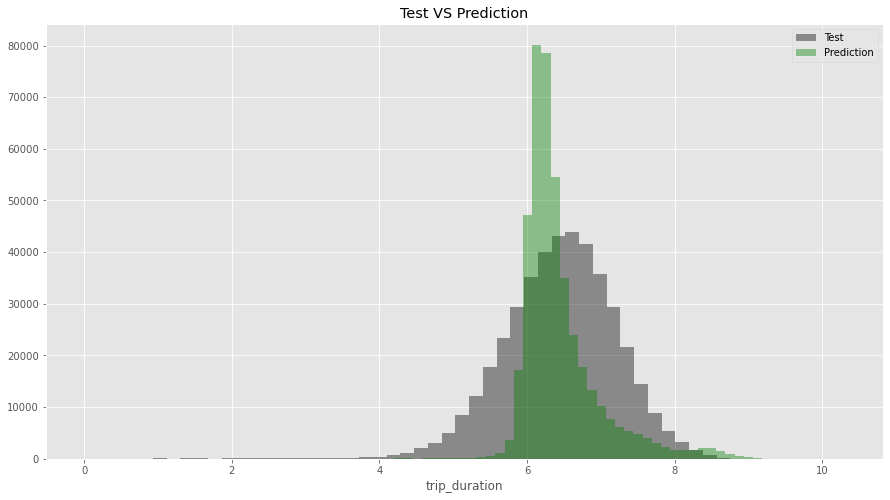

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(y_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

In [ ]:
# for the simple linear regression, the root mean log squared error is still quite high round 0.55

# XGBoost predicting log_trip_duraiton

In [25]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [46]:

xgb_pars = {'min_child_weight': 1, 'eta': 0.3, 'colsample_bytree': 0.9, 
            'max_depth': 7, 'subsample': 0.9, 'lambda': 1., 'nthread': -1,
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:linear'}
# Train the model
model_xgb = xgb.train(xgb_pars, dtrain, 20, watchlist, early_stopping_rounds=2, maximize=False, verbose_eval=1)
print('Modeling RMSE %.5f' % model_xgb.best_score)


[11:43:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:4.20938	valid-rmse:4.20831
[1]	train-rmse:2.96252	valid-rmse:2.96152
[2]	train-rmse:2.09458	valid-rmse:2.09348
[3]	train-rmse:1.49464	valid-rmse:1.49355
[4]	train-rmse:1.08475	valid-rmse:1.08391
[5]	train-rmse:0.81045	valid-rmse:0.80990
[6]	train-rmse:0.63150	valid-rmse:0.63132
[7]	train-rmse:0.52105	valid-rmse:0.52144
[8]	train-rmse:0.45592	valid-rmse:0.45687
[9]	train-rmse:0.41825	valid-rmse:0.41976
[10]	train-rmse:0.39782	valid-rmse:0.39990
[11]	train-rmse:0.38648	valid-rmse:0.38883
[12]	train-rmse:0.37791	valid-rmse:0.38066
[13]	train-rmse:0.37320	valid-rmse:0.37631
[14]	train-rmse:0.36941	valid-rmse:0.37284
[15]	train-rmse:0.36763	valid-rmse:0.37153
[16]	train-rmse:0.36554	valid-rmse:0.36977
[17]	train-rmse:0.36395	valid-rmse:0.36864
[18]	train-rmse:0.36264	vali

In [42]:
# Predict the labels of the test set: preds
xgbpreds = model_xgb.predict(data_dmatrix)
##https://gist.github.com/vidit0210/efc9b86616988abace609ae36a37306a

Text(0.5, 1.0, 'Test VS Prediction')

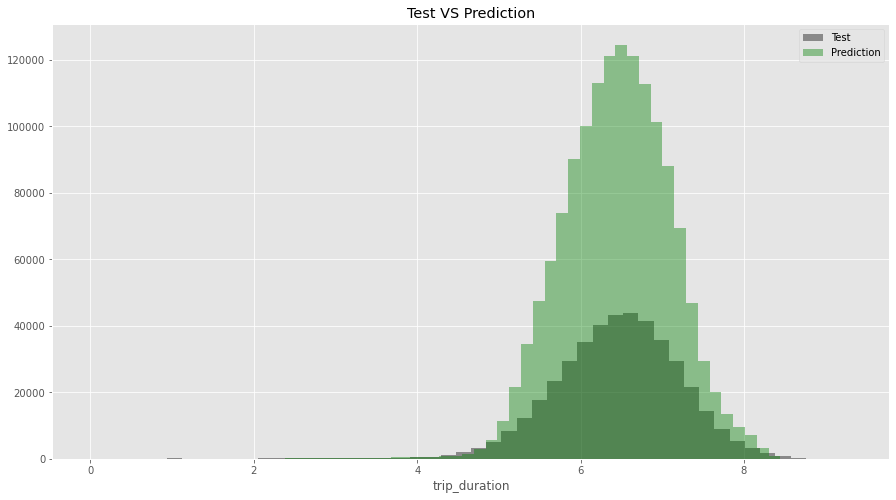

In [43]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(xgbpreds, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

In [ ]:
## we can see that XGBoost is better than simple linear regression model which have lower RSME